<a href="https://colab.research.google.com/github/ArifAygun/Sentiment-Analysis-SMRT/blob/main/SMRT_Statistical_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [184]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive/')
%cd /content/drive/My Drive/Web_Scraping/SMRT/

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/My Drive/Web_Scraping/SMRT


In [185]:
reviews= pd.read_excel('Capterra_SMRT_Final.xlsx', 'Final')

In [186]:
reviews.head().transpose()

,0,1,2,3,4
Date,2019-08-20 00:00:00,2020-06-18 00:00:00,2020-08-10 00:00:00,2020-08-10 00:00:00,2020-08-10 00:00:00
User Name,Joshua V.,Daniel C.,Kyle M.,Jason Y.,Amy W.
User Position,Ceo,Owner,Director of Operations,Vice President,Manager
Department,Information Technology and Services,Consumer Services,Consumer Services,Retail,Policies and ProceduresConsumer Services
Employees,1-10,11-50,11-50,51-200,11-50
Use Period,Less than 6 months,2+ years,1-2 years,2+ years,2+ years
Overall Rating,5,5,5,5,5
Ease of Use,5,5,5,5,4
Customer Service,5,5,5,5,5
Features,5,5,5,5,4


In [187]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Date                     115 non-null    datetime64[ns]
 1   User Name                115 non-null    object        
 2   User Position            113 non-null    object        
 3   Department               115 non-null    object        
 4   Employees                115 non-null    object        
 5   Use Period               115 non-null    object        
 6   Overall Rating           115 non-null    int64         
 7   Ease of Use              115 non-null    int64         
 8   Customer Service         115 non-null    int64         
 9   Features                 115 non-null    int64         
 10  Value for Money          110 non-null    float64       
 11  Likelihood to Recommend  115 non-null    int64         
 12  Headline                 115 non-nul

## UNIQUE VALUES

In [188]:
unique_value_counts = reviews.nunique()

# Print the number of unique values for each column
print(unique_value_counts)

Date                        80
User Name                  113
User Position               22
Department                  14
Employees                    5
Use Period                   5
Overall Rating               3
Ease of Use                  5
Customer Service             5
Features                     4
Value for Money              3
Likelihood to Recommend      6
Headline                   112
Overall Rev                 94
Pros                       115
Cons                       115
Alternative Considered      12
Reasons for Choosing        53
Switched From               14
Reasons for Switching       80
Vendor Response              4
dtype: int64


### User Position

In [189]:
# Get the counts of each unique value in the "User Position" column
position_counts = reviews['User Position'].value_counts()

# Print the number of each unique value with its count
print("User Position Counts:")
print(position_counts)

User Position Counts:
Owner                       52
President                   21
Ceo                         10
Manager                      6
Vice President               4
General Manager              3
Customer Service             2
President/CEO                1
Admin assistant/manager      1
Operations Manager           1
General manager              1
Director of Operations       1
President CEO                1
Vice president               1
Bookkeeper                   1
Coordinator                  1
Chief Operations Officer     1
Store Manager                1
Support Specialist           1
production manager           1
Store General Manager        1
Route Operations Manager     1
Name: User Position, dtype: int64


#### Standardize "User Position" values by converting any value containing "manager" to "Manager"

In [190]:
reviews['User Position'] = reviews['User Position'].str.replace(r'.*manager.*', 'Manager', case=False)

# Get the updated counts of each unique value in the "User Position" column
position_counts = reviews['User Position'].value_counts()

# Print the number of each unique value with its count
print("User Position Counts:")
print(position_counts)


User Position Counts:
Owner                       52
President                   21
Manager                     16
Ceo                         10
Vice President               4
Customer Service             2
Director of Operations       1
President/CEO                1
President CEO                1
Vice president               1
Bookkeeper                   1
Coordinator                  1
Chief Operations Officer     1
Support Specialist           1
Name: User Position, dtype: int64


<ipython-input-190-4f4a0021b6ce>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  reviews['User Position'] = reviews['User Position'].str.replace(r'.*manager.*', 'Manager', case=False)


#### Standardize "User Position" values by converting any value containing "president" to "President"

In [191]:
reviews['User Position'] = reviews['User Position'].str.replace(r'.*president.*', 'President', case=False)

# Get the updated counts of each unique value in the "User Position" column
position_counts = reviews['User Position'].value_counts()

# Print the number of each unique value with its count
print("User Position Counts:")
print(position_counts)


User Position Counts:
Owner                       52
President                   28
Manager                     16
Ceo                         10
Customer Service             2
Director of Operations       1
Bookkeeper                   1
Coordinator                  1
Chief Operations Officer     1
Support Specialist           1
Name: User Position, dtype: int64


<ipython-input-191-44e3d3fc23aa>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  reviews['User Position'] = reviews['User Position'].str.replace(r'.*president.*', 'President', case=False)


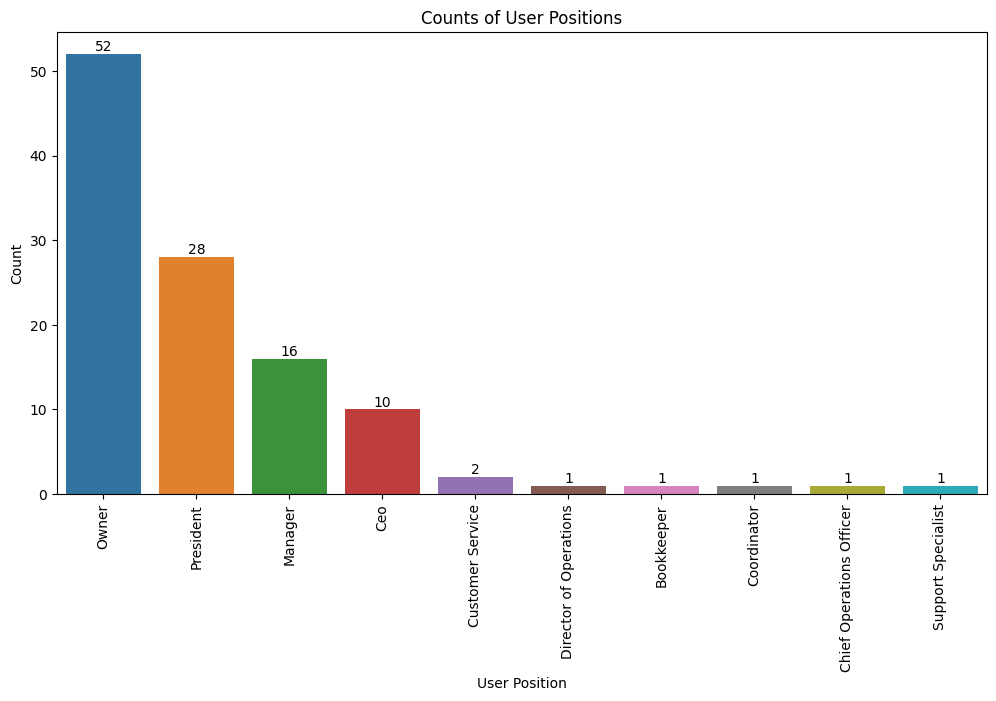

In [200]:
# Get the counts of each unique value in the "User Position" column
position_counts = reviews['User Position'].value_counts()

plt.figure(figsize=(12, 6))
ax = sns.countplot(data=reviews, x='User Position', order=position_counts.index)
plt.xticks(rotation=90)

plt.xlabel('User Position')
plt.ylabel('Count')
plt.title('Counts of User Positions')

for p in ax.patches:
    plt.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

plt.show()

### Department

In [193]:
# Get the counts of each unique value in the "Department" column
department_counts = reviews['Department'].value_counts()

# Print the number of each unique value with its count
print("Department Counts:")
print(department_counts)

Department Counts:
Consumer Services                           41
Retail                                      38
Textiles                                    14
Apparel & Fashion                            7
Hospitality                                  5
Individual & Family Services                 2
Information Technology and Services          1
Policies and ProceduresConsumer Services     1
Management Consulting                        1
Health Wellness and Fitness                  1
Dairy                                        1
Computer Software                            1
Accounting                                   1
SMRT                                         1
Name: Department, dtype: int64


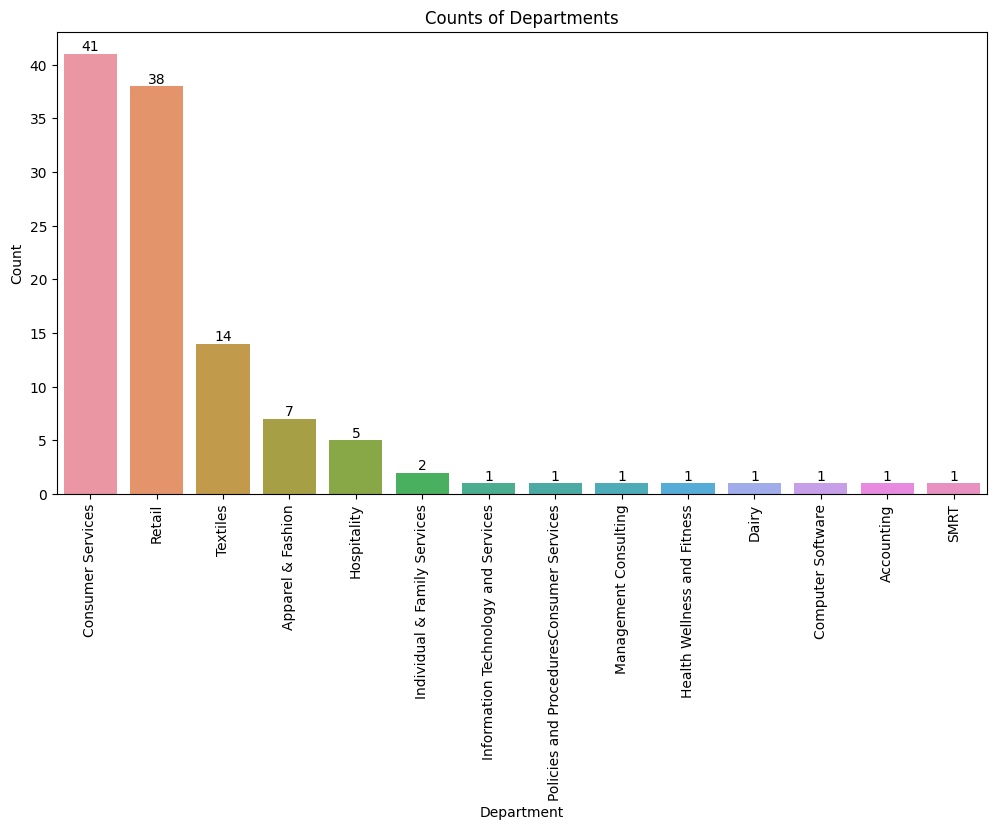

In [194]:
# Get the counts of each unique value in the "Department" column
department_counts = reviews['Department'].value_counts()

# Create a bar plot to visualize the unique values and their counts
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=department_counts.index, y=department_counts.values)
plt.xticks(rotation=90)

plt.xlabel('Department')
plt.ylabel('Count')
plt.title('Counts of Departments')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

plt.show()

### Employees

In [195]:
# Get the counts of each unique value in the "Department" column
employees_counts = reviews['Employees'].value_counts()

# Print the number of each unique value with its count
print("Employees Counts:")
print(employees_counts)

Employees Counts:
11-50            54
1-10             38
51-200           21
201-500           1
Self-employed     1
Name: Employees, dtype: int64


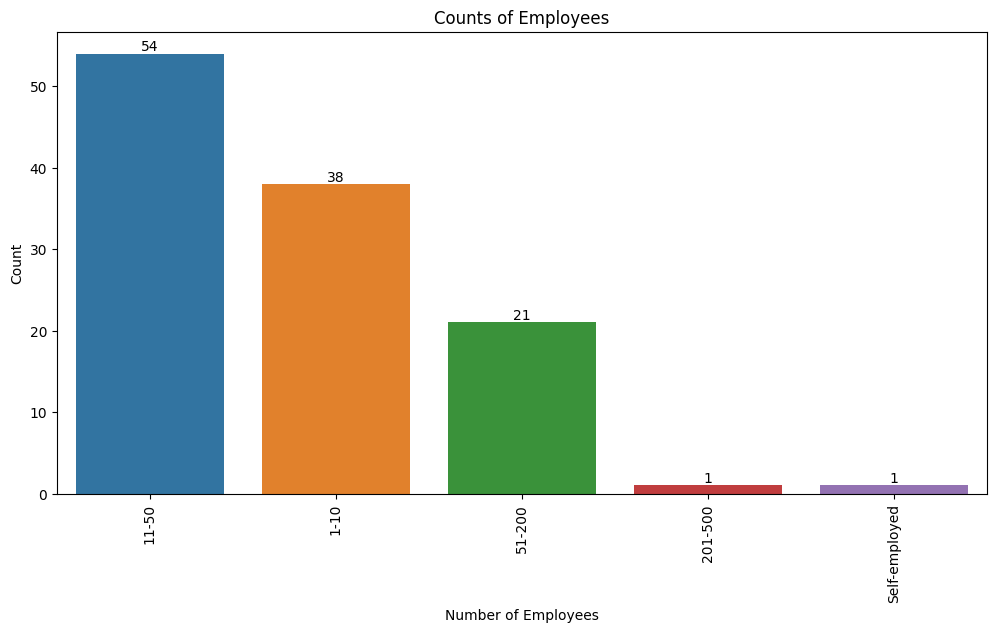

In [196]:
# Get the counts of each unique value in the "Employees" column
employees_counts = reviews['Employees'].value_counts()

# Create a bar plot to visualize the unique values and their counts
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=employees_counts.index, y=employees_counts.values)
plt.xticks(rotation=90)

plt.xlabel('Number of Employees')
plt.ylabel('Count')
plt.title('Counts of Employees')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

plt.show()

### Use Period

In [197]:
# Get the counts of each unique value in the "Department" column
use_counts = reviews['Use Period'].value_counts()

# Print the number of each unique value with its count
print("Use Period Counts:")
print(use_counts)

Use Period Counts:
Less than 6 months     49
2+ years               32
1-2 years              17
6-12 months            16
I used a free trial     1
Name: Use Period, dtype: int64


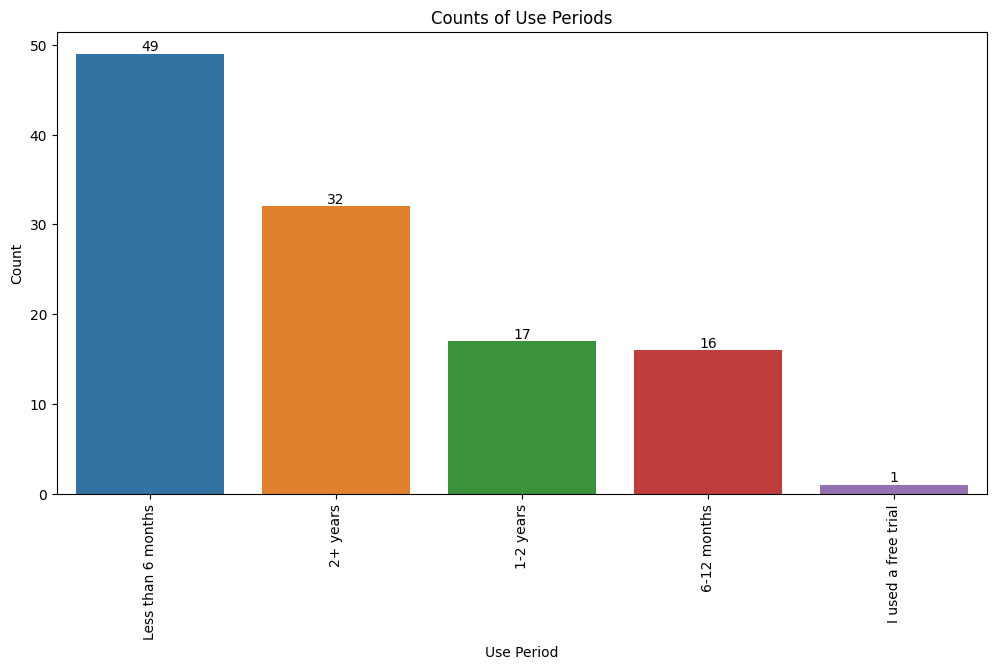

In [198]:
# Get the counts of each unique value in the "Use Period" column
use_period_counts = reviews['Use Period'].value_counts()

plt.figure(figsize=(12, 6))
ax = sns.barplot(x=use_period_counts.index, y=use_period_counts.values)
plt.xticks(rotation=90)

plt.xlabel('Use Period')
plt.ylabel('Count')
plt.title('Counts of Use Periods')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

plt.show()